In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import f1_score
data = pd.read_csv('../dataset/data_5diagnosis.csv')
# data['Diagnosis'] = data['Diagnosis'].apply(lambda x: 0 if x == 'Healthy' else 1)
df = data.drop('Diagnosis', axis=1)
diagnosis=data.Diagnosis

## ACP

In [26]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(df), columns = df.columns)
pca = PCA(n_components=2)
pcs = pca.fit_transform(X)
pcs = pd.DataFrame(pcs,columns=[f"PC{i}" for i in range(1, 3)])
X['z'] = data['Diagnosis']
pcs['z'] = data['Diagnosis']

## LDA/QDA/NB

In [27]:
models = [
(LinearDiscriminantAnalysis, "LDA"),
(QuadraticDiscriminantAnalysis, "QDA"),
(GaussianNB, "NB"),
]
#sans score F1 :
"""def validation_errors(df, models):
    y = df.z
    X = df.drop(columns=["z"])
    for model, name in models:
        for acc in cross_val_score(model(), X, y, cv=10):
            yield name, acc"""

#avec score F1
def validation_errors(df, models):
    y = df.z
    X = df.drop(columns=["z"])
    for model, name in models:
        acc_scores = cross_val_score(model(), X, y, cv=10)
        f1_scores = cross_val_score(model(), X, y, cv=10, scoring='f1_macro')
        for acc, f1 in zip(acc_scores, f1_scores):
            yield name, acc, f1

scores_discri = pd.DataFrame(validation_errors(pcs, models), columns=["Model", "Acc","F1"])

print(scores_discri)

   Model       Acc        F1
0    LDA  0.571429  0.472541
1    LDA  0.621622  0.517963
2    LDA  0.792793  0.649946
3    LDA  0.756757  0.619787
4    LDA  0.702703  0.566436
5    LDA  0.747748  0.609751
6    LDA  0.711712  0.584685
7    LDA  0.702703  0.576441
8    LDA  0.549550  0.528517
9    LDA  0.594595  0.510796
10   QDA  0.580357  0.477136
11   QDA  0.612613  0.553178
12   QDA  0.783784  0.640932
13   QDA  0.801802  0.659464
14   QDA  0.684685  0.547764
15   QDA  0.774775  0.637390
16   QDA  0.720721  0.593116
17   QDA  0.720721  0.687237
18   QDA  0.522523  0.496333
19   QDA  0.531532  0.531797
20    NB  0.553571  0.462664
21    NB  0.612613  0.512524
22    NB  0.792793  0.649946
23    NB  0.801802  0.659464
24    NB  0.684685  0.550548
25    NB  0.738739  0.603211
26    NB  0.720721  0.593116
27    NB  0.702703  0.578937
28    NB  0.450450  0.441772
29    NB  0.594595  0.575095


## KNN

In [28]:
cls = KNeighborsClassifier(n_neighbors=4)
cls.fit(pcs.drop(columns="z"),diagnosis)

scores_KNN = pd.DataFrame({"Acc":cross_val_score(cls, pcs.drop(columns="z"), diagnosis, cv=10), "F1": cross_val_score(cls, pcs.drop(columns="z"), diagnosis, cv=10,scoring='f1_macro')})
scores_KNN.insert(loc=0, column='Model', value='KNN')
print(scores_KNN)

mean_accuracy = scores_KNN['Acc'].mean()
mean_f1 = scores_KNN['F1'].mean()

print(f"Moyenne de l'accuracy: {mean_accuracy}")
print(f"Moyenne de F1: {mean_f1}")

  Model       Acc        F1
0   KNN  0.526786  0.480104
1   KNN  0.774775  0.686032
2   KNN  0.855856  0.697177
3   KNN  0.900901  0.741841
4   KNN  0.837838  0.754875
5   KNN  0.909910  0.797959
6   KNN  0.891892  0.745511
7   KNN  0.738739  0.649182
8   KNN  0.522523  0.493202
9   KNN  0.576577  0.553179
Moyenne de l'accuracy: 0.7535794723294723
Moyenne de F1: 0.6599061989608688


## Régression logistique

In [29]:
#linéaire
cls = LogisticRegression(penalty=None)
cls.fit(pcs.drop(columns="z"), diagnosis)

scores_reg_lin = pd.DataFrame({"Acc":cross_val_score(cls, pcs.drop(columns="z"), diagnosis, cv=10, scoring='accuracy'), "F1": cross_val_score(cls, pcs.drop(columns="z"), diagnosis, cv=10,scoring='f1_macro')})
scores_reg_lin.insert(loc=0, column='Model', value='LRL')
#multiple
poly = PolynomialFeatures(degree=3)
cls = LogisticRegression()
pipe = make_pipeline(poly, cls)
pipe.fit(pcs.drop(columns="z"), diagnosis)

scores_reg_quad = pd.DataFrame({"Acc":cross_val_score(cls, pcs.drop(columns="z"), diagnosis, cv=10, scoring='accuracy'),"F1": cross_val_score(cls, pcs.drop(columns="z"), diagnosis, cv=10,scoring='f1_macro')})
scores_reg_quad.insert(loc=0, column='Model', value='LRQ')

print(scores_reg_lin)
print(scores_reg_quad)

  Model       Acc        F1
0   LRL  0.589286  0.491877
1   LRL  0.621622  0.518864
2   LRL  0.765766  0.623444
3   LRL  0.747748  0.611071
4   LRL  0.657658  0.522431
5   LRL  0.765766  0.627558
6   LRL  0.711712  0.585210
7   LRL  0.729730  0.605552
8   LRL  0.549550  0.522141
9   LRL  0.603604  0.517620
  Model       Acc        F1
0   LRQ  0.598214  0.501046
1   LRQ  0.612613  0.510036
2   LRQ  0.765766  0.623444
3   LRQ  0.747748  0.611071
4   LRQ  0.675676  0.538199
5   LRQ  0.765766  0.627558
6   LRQ  0.711712  0.585210
7   LRQ  0.720721  0.598202
8   LRQ  0.549550  0.522141
9   LRQ  0.612613  0.519527


d:\alexa\Github\projet-sy09\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [30]:
from sklearn.ensemble import RandomForestClassifier

# Ajuster le modèle Random Forest optimisé
model = RandomForestClassifier(n_estimators=100, random_state=3, ccp_alpha=0.001)
model.fit(pcs.drop(columns="z"), diagnosis)

# Calcul des scores de validation croisée
scores_rf = pd.DataFrame({
    "Acc": cross_val_score(model, pcs.drop(columns="z"), diagnosis, cv=10, scoring='accuracy'),
    "F1": cross_val_score(model, pcs.drop(columns="z"), diagnosis, cv=10, scoring='f1_macro')
})

# Ajouter une colonne pour le modèle
scores_rf.insert(loc=0, column='Model', value='RF')

# Afficher les résultats
print(scores_rf)

mean_accuracy = scores_rf['Acc'].mean()
mean_f1 = scores_rf['F1'].mean()

print(f"Moyenne de l'accuracy: {mean_accuracy}")
print(f"Moyenne de F1: {mean_f1}")


  Model       Acc        F1
0    RF  0.553571  0.502097
1    RF  0.774775  0.705790
2    RF  0.873874  0.760075
3    RF  0.891892  0.734594
4    RF  0.819820  0.704080
5    RF  0.882883  0.726557
6    RF  0.900901  0.792635
7    RF  0.765766  0.666063
8    RF  0.531532  0.496434
9    RF  0.594595  0.587285
Moyenne de l'accuracy: 0.7589607464607465
Moyenne de F1: 0.6675610300493442


In [31]:
from sklearn.svm import SVC


svm_cls = SVC(kernel='rbf')  # Vous pouvez changer le kernel selon vos besoins
svm_cls.fit(pcs.drop(columns="z"), diagnosis)

# Calcul des scores de validation croisée pour l'accuracy et le F1-macro
acc_scores = cross_val_score(svm_cls, pcs.drop(columns="z"), diagnosis, cv=10, scoring='accuracy')
f1_scores = cross_val_score(svm_cls, pcs.drop(columns="z"), diagnosis, cv=10, scoring='f1_macro')

# Créer un DataFrame pour stocker les scores individuels
scores_svm = pd.DataFrame({
    "Acc": acc_scores,
    "F1": f1_scores
})

# Ajouter une colonne pour le modèle
scores_svm.insert(loc=0, column='Model', value='SVM')

# Calculer les moyennes des scores
mean_acc = acc_scores.mean()
mean_f1 = f1_scores.mean()

# Afficher les résultats
print("Scores individuels de validation croisée :")
print(scores_svm)
print("\nMoyenne des scores de validation croisée :")
print(f"Average Accuracy: {mean_acc:.4f}")
print(f"Average F1 Score: {mean_f1:.4f}")

#afficher la moyenne de accuracy et f1 de scores_svm

Scores individuels de validation croisée :
  Model       Acc        F1
0   SVM  0.589286  0.485667
1   SVM  0.657658  0.550436
2   SVM  0.837838  0.686630
3   SVM  0.882883  0.727027
4   SVM  0.783784  0.633629
5   SVM  0.891892  0.737261
6   SVM  0.783784  0.647798
7   SVM  0.738739  0.611285
8   SVM  0.540541  0.500264
9   SVM  0.549550  0.524206

Moyenne des scores de validation croisée :
Average Accuracy: 0.7256
Average F1 Score: 0.6104


## Analyse graphique

   Model       Acc        F1
0    LDA  0.571429  0.472541
1    LDA  0.621622  0.517963
2    LDA  0.792793  0.649946
3    LDA  0.756757  0.619787
4    LDA  0.702703  0.566436
..   ...       ...       ...
65    RF  0.882883  0.726557
66    RF  0.900901  0.792635
67    RF  0.765766  0.666063
68    RF  0.531532  0.496434
69    RF  0.594595  0.587285

[70 rows x 3 columns]
    Model Type de score     Score
0     LDA           Acc  0.571429
1     LDA           Acc  0.621622
2     LDA           Acc  0.792793
3     LDA           Acc  0.756757
4     LDA           Acc  0.702703
..    ...           ...       ...
135    RF            F1  0.726557
136    RF            F1  0.792635
137    RF            F1  0.666063
138    RF            F1  0.496434
139    RF            F1  0.587285

[140 rows x 3 columns]


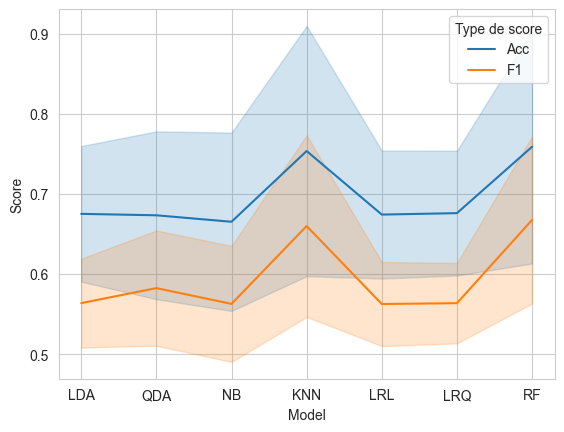

In [32]:
scores= pd.concat([scores_discri, scores_KNN, scores_reg_lin, scores_reg_quad, scores_rf], ignore_index=True)
print(scores)

scores_melted = scores.melt(id_vars=["Model"],value_vars=["Acc", "F1"], var_name="Type de score", value_name="Score")
#print scrores_melted pour scores_KNN et scores_rf
print(scores_melted)
sns.set_style("whitegrid")
sns.lineplot(x="Model", y="Score", data=scores_melted, hue="Type de score",errorbar='sd')
plt.show()